# Support Vector Machines - team Euler

In [29]:
from toepassing_procedures import *
import numpy as np
# data inladen
import pandas as pd
from pandas import read_csv
# grafieken
from matplotlib import pyplot as plt
from matplotlib import rc

### SVM toegepast op een dataset met tumoren in de borst

In [30]:
# We laden de data
gegevens = read_csv('breast_cancer.csv').sample(n=100)

# verander 0 in -1 en laat 1 staan
gegevens['diagnose'] = gegevens['diagnose'].replace(0, -1)

De features van de tumoren:

In [31]:
gegevens.columns

Index(['diagnose', 'mean radius', 'mean texture', 'mean perimeter',
       'mean area', 'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

Elke tumor is ofwel goedaardig ofwel kwaadaardig:

In [32]:
diagnoses = gegevens['diagnose'].values

print("Diagnoses:")
diagnoses

Diagnoses:


array([ 1, -1,  1,  1,  1, -1, -1,  1, -1, -1, -1,  1, -1,  1,  1, -1, -1,
        1, -1,  1,  1, -1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1, -1,  1,  1, -1,  1,  1,
       -1, -1, -1, -1, -1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1])

In [33]:
data = gegevens.drop(['diagnose'], axis=1)

print("De data (zonder de diagnoses:)")
print(data)

De data (zonder de diagnoses:)
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
320       10.250         16.18           66.52      324.2          0.10610   
408       17.990         20.66          117.80      991.7          0.10360   
240       13.640         15.60           87.38      575.3          0.09423   
103        9.876         19.40           63.95      298.3          0.10050   
110        9.777         16.99           62.50      290.2          0.10370   
..           ...           ...             ...        ...              ...   
150       13.000         20.78           83.51      519.4          0.11350   
133       15.710         13.93          102.00      761.7          0.09462   
19        13.540         14.36           87.46      566.3          0.09779   
485       12.450         16.41           82.85      476.7          0.09514   
439       14.020         15.66           89.59      606.5          0.07966   

     mean compactness  mean conc

We beperken ons tot twee features, aangezien de berekeningen anders te moeilijk zouden worden en we het SVM model niet visueel zouden kunnen voorstellen. We maken een pairplot om te zien welke twee features we willen selecteren.

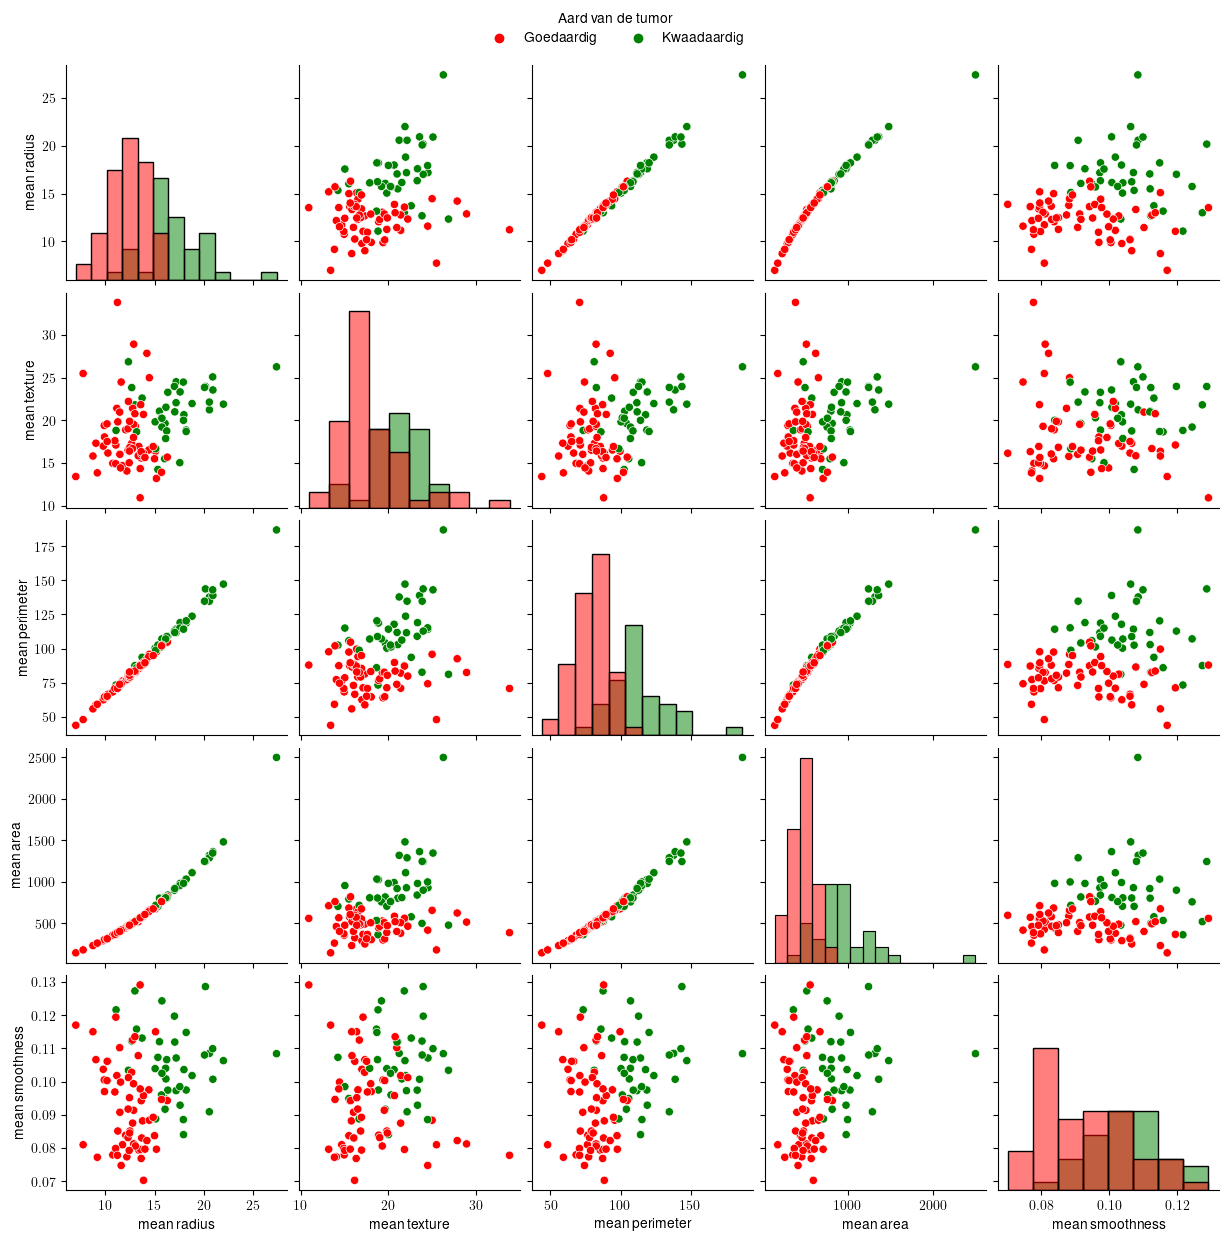

In [34]:
import seaborn as sns

diagnosesInWoorden = gegevens.copy()
diagnosesInWoorden['diagnose'] = gegevens['diagnose'].map({-1: 'Kwaadaardig', 1: 'Goedaardig'})

# we doen een sns pairplot met de eerste 5 features in de kleuren groen en rood
# 1 = goedaardig in de legende, 0 = kwaadaardig
pp = sns.pairplot(diagnosesInWoorden,vars=diagnosesInWoorden.columns[1:6], hue="diagnose", palette=["r","g"], height=2.5,diag_kind="hist")

handles = pp._legend_data.values()
labels = pp._legend_data.keys()

# pp.fig.legend(handles=handles, labels=labels, loc='upper center', ncol=2)


sns.move_legend(pp, "upper center",title='Aard van de tumor', ncols=2)
pp.fig.subplots_adjust(top=0.95, bottom=0.05)

# schrijf de plot naar een bestand
plt.show()

We selecteren onderstaande twee features:

In [35]:

feature1 = 'mean texture'
feature2 = 'mean radius'

# haal de indices van de twee features op
featureIndices = [gegevens.columns.get_loc(feature1), gegevens.columns.get_loc(feature2)]

X = gegevens.iloc[:, featureIndices].values
y = gegevens.iloc[:, 0].values

print("x-waarden voor de mean texture en mean radius:")
print(X)

print("")

print("De diagnoses (y-waarden) voor alle tumoren:")
print(y)

x-waarden voor de mean texture en mean radius:
[[16.18  10.25 ]
 [20.66  17.99 ]
 [15.6   13.64 ]
 [19.4    9.876]
 [16.99   9.777]
 [18.83  11.08 ]
 [21.97  18.82 ]
 [14.69  11.74 ]
 [26.86  12.34 ]
 [22.07  17.19 ]
 [15.51  16.03 ]
 [18.9   12.06 ]
 [21.24  20.59 ]
 [15.79  13.78 ]
 [14.97  10.75 ]
 [21.08  15.5  ]
 [18.87  18.22 ]
 [14.93  11.04 ]
 [19.65  16.07 ]
 [17.12  11.06 ]
 [17.33   9.029]
 [21.82  13.   ]
 [16.39  15.1  ]
 [15.51  15.   ]
 [17.3   12.67 ]
 [22.14  20.58 ]
 [15.86  13.34 ]
 [22.61  13.73 ]
 [19.22  15.75 ]
 [21.54  16.16 ]
 [18.06   9.904]
 [21.41  11.16 ]
 [16.07  13.69 ]
 [19.59  10.16 ]
 [19.83  15.06 ]
 [16.95  13.4  ]
 [21.84  13.59 ]
 [28.92  12.88 ]
 [23.29  16.35 ]
 [27.85  14.22 ]
 [20.31  15.7  ]
 [16.03  11.47 ]
 [24.52  17.2  ]
 [19.02  12.3  ]
 [19.31  13.05 ]
 [14.26  15.34 ]
 [19.54  12.87 ]
 [15.7   16.3  ]
 [18.77  16.24 ]
 [15.83   8.726]
 [24.99  14.47 ]
 [23.56  20.94 ]
 [23.97  20.18 ]
 [24.48  17.93 ]
 [21.9   22.01 ]
 [23.98  17.02 ]
 

In [36]:
# splits in 50% train, 25% validatie en 25% test
trainingX, testX, trainingY, testY = train_test_split(X, y, test_size=0.25)
trainingX, validatieX, trainingY, validatieY = train_test_split(trainingX, trainingY, test_size=0.33)

print("Grootte trainingset:", trainingX.shape)
print("Grootte validatieset:", validatieX.shape)
print("Grootte testset:", testX.shape)

Grootte trainingset: (50, 2)
Grootte validatieset: (25, 2)
Grootte testset: (25, 2)


We bepalen de beste waarde voor de regularisatieparameter $\lambda$ aan de hand van de validatieset (zie eindverslag) en evalueren de accuraatheid:

De beste lambda is 1.0505919191919193
De accuraatheid bij deze lambda is 92.0


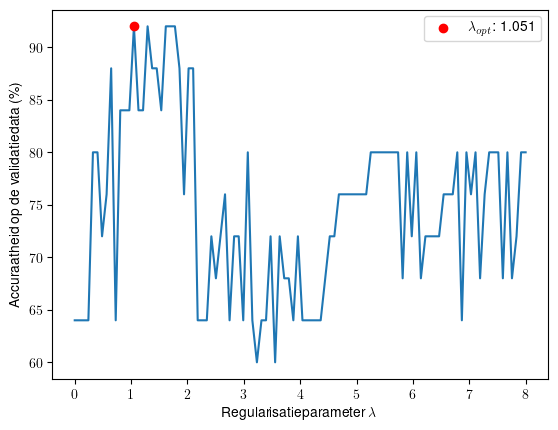

In [37]:
# we bepalen de optimale regulairisatieparameter lambda
mogelijkeLambdas = np.linspace(0.0001, 8, 100)
leerTempo = 0.001
aantalIteraties = 1000

accuraatheden = []

for lambdaParam in mogelijkeLambdas:
    w, b = fit(trainingX, trainingY, leerTempo, lambdaParam, aantalIteraties)
    voorsp = voorspelling(validatieX, w, b)
    accuraatheden.append(accuraatheid(voorsp, validatieY))

besteLambda = mogelijkeLambdas[accuraatheden.index(max(accuraatheden))]
print(f"De beste lambda is {besteLambda}")
print(f"De accuraatheid bij deze lambda is {max(accuraatheden)}")

# we plotten de accurraatheid tegen de lambda
plt.figure()

rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

plt.plot(mogelijkeLambdas, accuraatheden)
plt.scatter(besteLambda, max(accuraatheden), color='red', label="$\lambda_{opt}$: %.3f"%besteLambda, zorder=10)
plt.xlabel('Regularisatieparameter $\lambda$')
plt.ylabel('Accuraatheid op de validatiedata (\%)')
plt.legend()
plt.show()

Het model toegepast op de testdata met $\lambda=\lambda_\text{opt}$:

We plotten nu het SVM toegepast op de testdata.
Via crossvalidation bepaalden we dat de beste waarde voor lambda gelijk is aan 1.0505919191919193
De accuraatheid is 84.0%


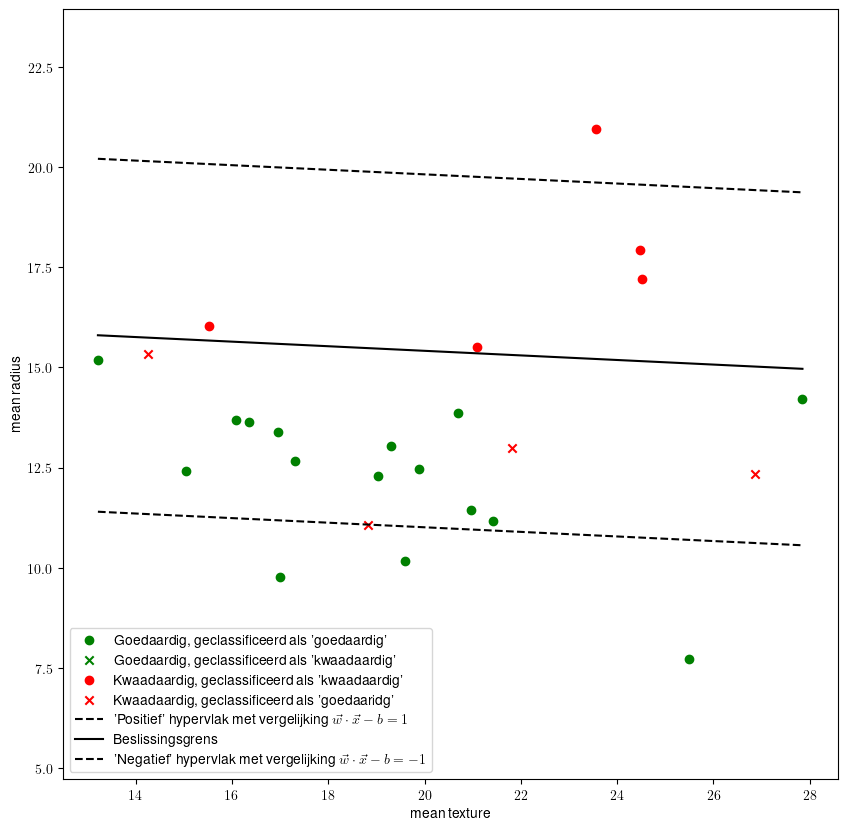

In [40]:
lambdaOpt = besteLambda
leerTempo = 0.001
aantalIteraties = 1000

print("We plotten nu het SVM toegepast op de testdata.")
print("Via crossvalidation bepaalden we dat de beste waarde voor lambda gelijk is aan", lambdaOpt)

# we trainen het model met de optimale lambda
w, b = fit(trainingX, trainingY, leerTempo, lambdaOpt, aantalIteraties)

voorsp = voorspelling(testX, w, b)

acc = accuraatheid(voorsp, testY)

print(f"De accuraatheid is {acc}%")

truePositives = [testX[i] for i in range(len(testX)) if voorsp[i] == 1 and testY[i] == 1]
falsePositives = [testX[i] for i in range(len(testX)) if voorsp[i] == 1 and testY[i] == -1]
trueNegatives = [testX[i] for i in range(len(testX)) if voorsp[i] == -1 and testY[i] == -1]
falseNegatives = [testX[i] for i in range(len(testX)) if voorsp[i] == -1 and testY[i] == 1]

fig = plt.figure(figsize=(10, 10))

rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

ax = fig.add_subplot(1, 1, 1)

plt.scatter([p[0] for p in truePositives], [p[1] for p in truePositives], marker="o", c="g", label="Goedaardig, geclassificeerd als 'goedaardig'")
plt.scatter([p[0] for p in falseNegatives], [p[1] for p in falseNegatives], marker="x", c="g", label="Goedaardig, geclassificeerd als 'kwaadaardig'")
plt.scatter([p[0] for p in trueNegatives], [p[1] for p in trueNegatives], marker="o", c="r", label="Kwaadaardig, geclassificeerd als 'kwaadaardig'")
plt.scatter([p[0] for p in falsePositives], [p[1] for p in falsePositives], marker="x", c="r", label="Kwaadaardig, geclassificeerd als 'goedaaridg'")

x0_1 = min(testX[:, 0])
x0_2 = max(testX[:, 0])

x1_1 = hyperplaneFunctie(x0_1, w, b, 0)
x1_2 = hyperplaneFunctie(x0_2, w, b, 0)

x1_1_m = hyperplaneFunctie(x0_1, w, b, -1)
x1_2_m = hyperplaneFunctie(x0_2, w, b, -1)

x1_1_p = hyperplaneFunctie(x0_1, w, b, 1)
x1_2_p = hyperplaneFunctie(x0_2, w, b, 1)

ax.set_xlabel(feature1)
ax.set_ylabel(feature2)

ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k--", label=r"'Positief' hypervlak met vergelijking $\vec{w}\cdot\vec{x} - b = 1$")
ax.plot([x0_1, x0_2], [x1_1, x1_2], "k", label="Beslissingsgrens")
ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k--", label=r"'Negatief' hypervlak met vergelijking $\vec{w}\cdot\vec{x} - b = -1$")

x1_min = np.amin(testX[:, 1])
x1_max = np.amax(testX[:, 1])
ax.set_ylim([x1_min - 3, x1_max + 3])

plt.legend()
plt.show()

We plotten het model voor 9 waarden van $\lambda$

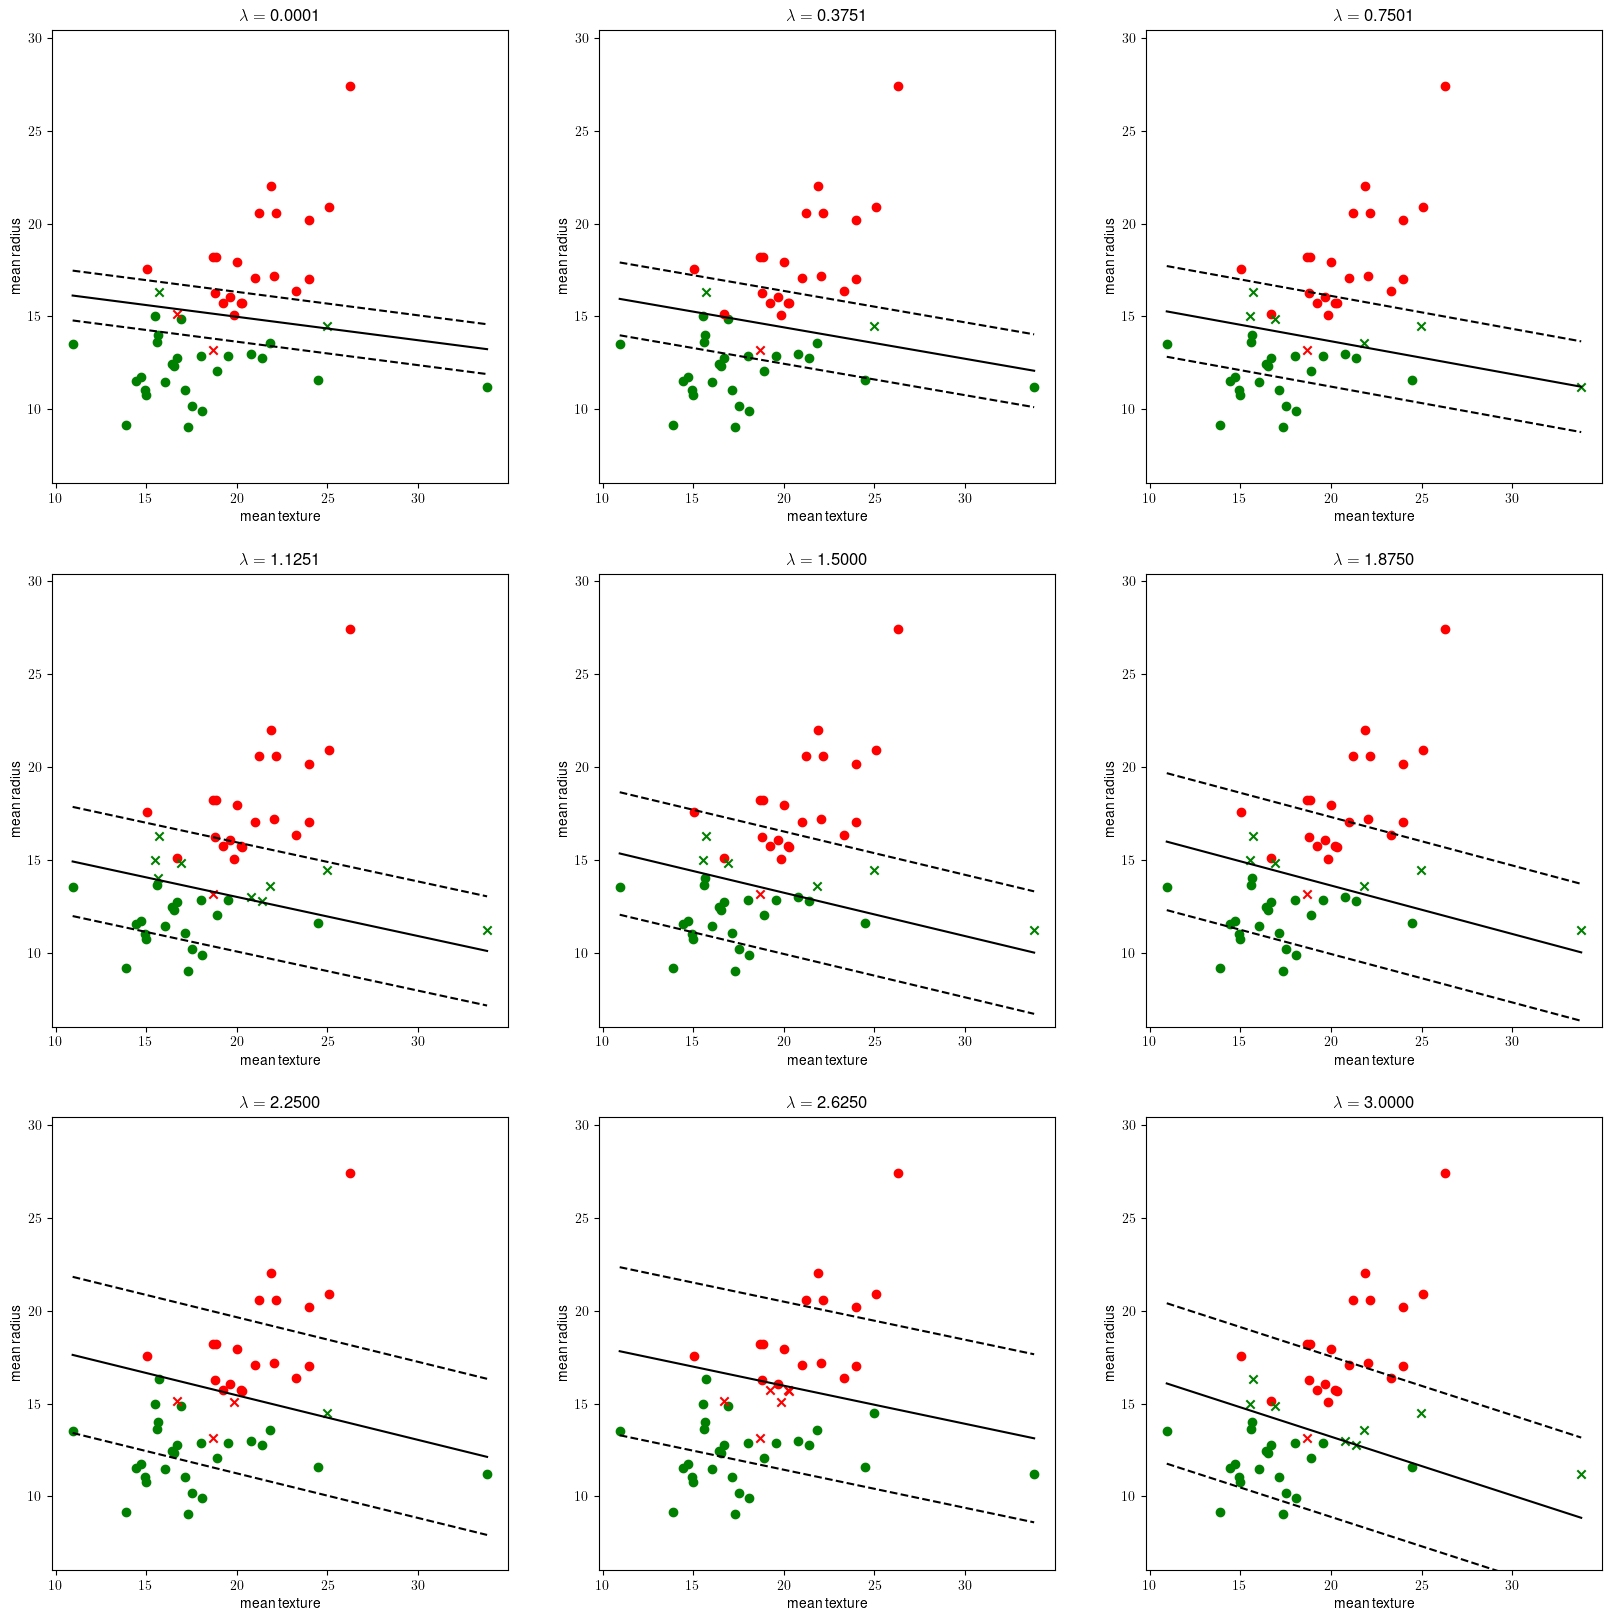

In [39]:
# 9 waarden voor lambda
mogelijkeLambdas = np.linspace(0.0001, 3, 9)

leerTempo = 0.001
aantalIteraties = 10000

fig = plt.figure(figsize=(20, 20))

for i, lambdaParam in enumerate(mogelijkeLambdas):

    w, b = fit(trainingX, trainingY, leerTempo, lambdaParam, aantalIteraties)
    voorsp = voorspelling(trainingX, w, b)

    truePositives = [trainingX[i] for i in range(len(trainingX)) if voorsp[i] == 1 and trainingY[i] == 1]
    falsePositives = [trainingX[i] for i in range(len(trainingX)) if voorsp[i] == 1 and trainingY[i] == -1]
    trueNegatives = [trainingX[i] for i in range(len(trainingX)) if voorsp[i] == -1 and trainingY[i] == -1]
    falseNegatives = [trainingX[i] for i in range(len(trainingX)) if voorsp[i] == -1 and trainingY[i] == 1]

    rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
    rc('text', usetex=True)

    ax = fig.add_subplot(3, 3, i+1)

    ax.set_title(f"$\lambda =$ %.4f"%lambdaParam)

    plt.scatter([p[0] for p in truePositives], [p[1] for p in truePositives], marker="o", c="g")
    plt.scatter([p[0] for p in falsePositives], [p[1] for p in falsePositives], marker="x", c="r")
    plt.scatter([p[0] for p in trueNegatives], [p[1] for p in trueNegatives], marker="o", c="r")
    plt.scatter([p[0] for p in falseNegatives], [p[1] for p in falseNegatives], marker="x", c="g")

    x0_1 = min(trainingX[:, 0])
    x0_2 = max(trainingX[:, 0])

    x1_1 = hyperplaneFunctie(x0_1, w, b, 0)
    x1_2 = hyperplaneFunctie(x0_2, w, b, 0)

    x1_1_m = hyperplaneFunctie(x0_1, w, b, -1)
    x1_2_m = hyperplaneFunctie(x0_2, w, b, -1)

    x1_1_p = hyperplaneFunctie(x0_1, w, b, 1)
    x1_2_p = hyperplaneFunctie(x0_2, w, b, 1)

    ax.set_xlabel(feature1)
    ax.set_ylabel(feature2)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "k", label="Beslissingshypervlak")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k--", label=r"Hypervlak met vergelijking $\vec{w}\cdot\vec{x} - b = 1$")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k--", label=r"Hypervlak met vergelijking $\vec{w}\cdot\vec{x} - b = -1$")

    x1_min = np.amin(trainingX[:, 1])
    x1_max = np.amax(trainingX[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])


plt.show()